# **Um mergulho na Equação de Onda** 

* PET- Física
* Petianos: Wallysson Pereira da Silva
* Data: 22/11/2024

O objetivo desse `Notebook` é fazer uma abordagem geral da **Equação de Onda**, expondo tanto uma de suas resoluções analíticas quanto sua resolução numérica (aqui se mostrando presente o uso de ferramentais numéricos). Tendo isso em vista, esse `Notebook` será divido nos seguintes tópicos:
1. Introdução da Equação de Onda
2. Resolução Analítica
3. Resolução Numérica



A primeira seção estará totalmente dedicada à apresentação da Equação de Onda, junto com uma rápida e superficial motivação sobre a mesma.

Já na segunda seção, apesar de estar indexada como Resolução Analítica, iremos utilizar sua solução para ilustrar o comportamento da onda por meio de gráficos, fato que acredito que melhore signifivamente nosso entendimento sobre fenomenos oscilatórios.

Por fim, na última parte desse `Notebook`, estaremos totalmente focados na resolução numérica da Equação de Onda, utilizando o método ().

### **Pré-requisitos**
Para o total entendimento desse `Notebook`, é interessante que o leitor tenha conhecimentos básicos de programação (sobretudo em python), junto de uma pequena noção sobre derivadas (totais e parciais) de funções. No entanto, esse trabalho busca servir como uma base para quem está estudando a Equação de Onda, então a abordagem buscará ser bem elucidativa. 

No entanto, tanto na abordagem analítica, quanto na numérica, conhecimento prévios sobre a Série de Fourier e a Transformada Discreta de Fourier são necessários para o melhor entendimento dos métodos.

### **Importando as bibliotecas**

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sin, cos, pi
from numpy.fft import rfft, irfft

### **Informações sobre as bibliotecas**

## 1. Introdução

O estudo da Equação de Ondas é de suma importância para a física, justamente porque ela pode vir a convernar tanto a propagação de uma onda sonora (mecânica), quanto de uma onda eletromagnética. Assim, a sua se torna extremamente importante. 
A Equação de Onda  tem a seguinte forma: 

$$ \frac{\partial^2 u(x,t)}{\partial x^2}  - \frac{1}{v^2} \frac{\partial^2 u(x,t)}{\partial t^2} = 0$$

Ou, equivalentemente: 

$$ \frac{\partial^2 u(x,t)}{\partial t^2} =  v^2 \frac{\partial^2 u(x,t)}{\partial x^2}$$

Podemos pensar basicamente que a função $u(x,t)$ nos retorna o valor da amplitude de oscilação em função da sua posição $x$ (no caso unidimensional) e do tempo $t$. O fator $v$ é a velocidade de propagação da onda.

### 2. **Resolução Analítica - Método de Separação de Variáveis**

Pessoalmente acredito que o acompanhamento da resolução analítica é muito importante para o entendimento da Equação de Onda. Dito isso, estarei a segui demonstrando a resolução analítica da Equação de Onda através do Método de Separação de Variáveis.

Para a resolução, iremos considerar um caso em especial, onde, depois de fixar as extremidades de uma corda em, puxamos a corda até uma determinada amplitude. Nesse caso, chamado de **corda elástica com deslocamento inicial não-nulo**, teremos que a velocidade de cada ponto em $t=0$ será nula. Fazendo um resumo das consições tanto de contorno quanto iniciais:

Condições de contorno:

$$u(0,t) = u(L,t) = 0 $$

Consição inicial:

$$u(x,0) = f(x)  \text{ e } \frac{\partial u(x,0)}{\partial t} = 0 $$ 

Na primeira condição inicial, teremos que o deslocamento inicial de cada ponto da corda será dada pelo valor da função $f(x)$ nesse dado ponto $x$.

O resultado da EDP (Equação Diferencial Parcial) apresentada é uma função $u(x,t)$, ou seja, uma função de duas variáveis independentes. No presente método, estaremos supondo que $u(x,t)$ pode ser escrita como a **multiplicação** de duas funções, uma dependente da variável $x$ e outra somente dependente da variável $t$. Assim:

$$u(x,t) = X(x)\cdot T(t)$$

Com essa condição imposta, vamos agora basicamente só obter os termos $\frac{\partial^2 u(x,t)}{\partial x^2}$ e $\frac{\partial^2 u(x,t)}{\partial t^2}$ e substituir na Equação e Onda.

Para o termo espacial:

$$\frac{\partial^2 u(x,t)}{\partial t^2} = \frac{\partial^2 [X(x)\cdot T(t)]}{\partial t^2}$$

Mas, considerando que estamos derivando em função do tempo, teremos que $X(x)$ pode ser tratado como uma constante. Daí segue:

$$\frac{\partial^2 u(x,t)}{\partial t^2} = X(x)\frac{\partial^2 T(t)}{\partial t^2}        $$

Contudo, como a função restante na derivada temporal só é função unica e exclusivamente da variável $t$, a derivada parcial se torna então uma derivada total:

$$\frac{\partial^2 u(x,t)}{\partial t^2} = X(x) \frac{d^2 T(t)}{dt^2} = X(x) T^{\prime\prime}(t)  $$

Com um raciocíno análogo, obtemos o termo equivalente para a termo espacial:

$$\frac{\partial^2 u(x,t)}{\partial x^2} = \frac{\partial^2 [X(x) \cdot T(t)]}{\partial x^2} = T(t) \frac{\partial^2 X(x)}{\partial x^2} = T(t) \frac{d^2 X(x)}{dx^2} = T(t) X^{\prime \prime}(x)$$

Vamos basicamente substituir as expressões obtidas na Equação de Onda, obtendo:

$$ \frac{\partial^2 u(x,t)}{\partial t^2} =  v^2 \frac{\partial^2 u(x,t)}{\partial x^2} \rightarrow X(x) T^{\prime\prime}(t) = v^2 T(t) X^{\prime \prime}(x)$$

Agora é conviente organizar essa igualdade da seguinte forma:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)}     $$

Aqui cabe uma análise da expressão que obtemos: de um lado temos uma função só de $x$, do outro uma função só de $t$. Contudo, como as funções estão intimamente ligadas através de uma igualdade, daí tiramos diretamente que elas _obrigatoriamente_ terão que ser iguais a uma dada constante. Para essa conclusão, basta pensarmos, por exemplo, que estamos variando o $x$ da expressão à esquerda. Porém, nada nos obriga a estar variando o $t$ ao mesmo tempo que variamos $x$. Assim, mesmo que a variável $x$ esteja assumindo diferentes valores (fato que poderia estar alterando todo o termo $\frac{X^{\prime\prime}(x)}{X(x)}$), o termo $\frac{X^{\prime\prime}(x)}{X(x)}$ não pode estar variando, justamente porque $\frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)}$ estará constante.

Chamando a constante de $\lambda$, obtemos a relação:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)} = \lambda   $$

Iremos analisar o termo espacial e o termo temporal separadamente. 

- Para o termo espacial:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \lambda \rightarrow X^{\prime\prime}(x) = \lambda X(x)$$ 

Por fim, obtemos simplesmente a EDO:

$$ X^{\prime\prime}(x) - \lambda X(x) = 0 $$ 

Que pode ser resolvida achando a equação característica e determinando a solução geral:

$$ r^2 - \lambda = 0 \rightarrow r^2 = \lambda \rightarrow r = \sqrt{\lambda}$$

Para estar de acordo com as condições de contorno, o valor dentro da raiz precisa ser negativo. Tendo em vista existência dessa condição, para transformar a constante $\lambda$ em um número positivo, fezemos:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)} = -\lambda   $$

Agora $\lambda$ essencialmente se torna um valor positivo, já que explicitamos o sinal negativo da igualdade.

Repetindo a análise da equação característica, obtemos:

$$r = \sqrt{-\lambda} = \sqrt{-1} \sqrt{\lambda} = i\sqrt{\lambda} $$

A solução geral para uma raiz complexa $\alpha \pm \beta i$ é: 

$$ X(x) = e^{\alpha}(A\cos{\beta x} + B\sin{\beta x})$$

Então, no nosso caso onde $\alpha = 0$ e $\beta = \sqrt{\lambda}$:

$$ X(x) = A\cos{\sqrt{\lambda}x} + B\sin{\sqrt{\lambda} x}$$

Aqui tiramos um tempo para analisar a solução $X(x)$ obtida em relação às condições iniciais. Tendo em vista que $u(0,t) = X(0)\cdot T(t) = 0$, teremos que $X(0) = 0$ (para evitar a solução trivial onde $T(t) = 0$ para todo $t$). Então:

$$X(0) = A\cos{\sqrt{\lambda} 0} + B\sin{\sqrt{\lambda} 0} = A = 0$$

Daí tiramos que a solução espacial será apenas:

$$ X(x) = B\sin{\sqrt{\lambda} x} $$

Agora aplicando a outra condições inicial, onde $u(L,t) = X(L)\cdot T(t) = 0$, donde tiramos que $X(L) = 0$, novamente para evitar uma solução trivial onde $T(t) = 0$ para todo $t$. Assim:

$$ X(L) = B\sin{\sqrt{\lambda}L} = 0$$

Se a constante $B$ for igual a zero também, caímos na solução trivial para $X(x)$. Então tremos que o termo do seno será igual a zero:

$$ \sin{\sqrt{\lambda}L} = 0$$

Daqui tiramos uma limitação para o valor de $lambda$, onde ele tem que ser tal que respeite: 

$$ \sqrt{\lambda} L = n\pi, \text{onde n} \in {0,1,2,3...}$$

Ou seja: 

$$ \sqrt{\lambda}= \frac{n\pi}{L}$$

Por fim resultando numa solução para o termo espacial:

$$ X_n(x) = B_n\sin{\frac{n\pi}{L}x} $$

O infixo $n$ foi inserido para destacar que temos uma família de soluções aqui, onde cada $n$ determina uma solução particular diferente. 

- Para o termo temporal:

Nós já basicamente obtemos a EDO:

$$\frac{T^{\prime\prime}(t)}{T(t)} = -v^2\lambda \rightarrow T^{\prime\prime}(t)+v^2\lambda T(t) = 0$$

Donde tiramos a equação característica:

$$ r^2 + v^2\lambda = 0 \rightarrow r = \sqrt{-v^2 \lambda} = v\sqrt{-\lambda} = iv\sqrt{\lambda}$$

De novo aplicando a solução geral para uma raíz complexa:

$$ T(t) = K_1\cos{v \sqrt{\lambda} t} + K_2\sin{v \sqrt{\lambda} t}$$

Mas, aplicando a condição inicial de que $\frac{\partial u(x,0)}{\partial t} = 0$:

$$\frac{\partial u(x,0)}{\partial t} = \frac{\partial [X(x)\cdot T(0)]}{\partial t} = X(x)\frac{d T(0)}{dt} = 0$$

Onde, novamente para evitar a solução trivial, teremos que:

$$ \frac{d T(0)}{dt} = 0$$

Aplicando essa condição à expressão $\frac{d T(t)}{dt} = -v\sqrt{\lambda}K_1\sin{v \sqrt{\lambda} t} + v\sqrt{\lambda}K_2\cos{v \sqrt{\lambda} t} $ obtida, teremos:

$$ \frac{d T(0)}{dt} = -v\sqrt{\lambda}K_1\sin{v \sqrt{\lambda} 0} + v\sqrt{\lambda}K_2\cos{v \sqrt{\lambda} 0} = 0 \rightarrow v\sqrt{\lambda}K_2 = 0 \rightarrow K_2 = 0$$

Assim, a solução fica:

$$ T(t) = K_1\cos{v\sqrt{\lambda}t}$$

Contudo, nos convenientemente já encontramos um valor para $\sqrt{\lambda}$ no calculo anterior. Portante, substituindo-o aqui:

$$ T_n(t) = K_1\cos{v\frac{n\pi}{L}t}$$

Por fim, a solução $u(x,t)$ fica:

$$u_n(x,t) = B_n\sin{\frac{n\pi}{L}x} K_n\cos{v\frac{n\pi}{L}t}$$

Para cada $n$ na expressão teremos uma solução. Contudo, para satisfazer qualquer condição inicial que seja, considereramos uma superposição dessas soluções fundamentais. Assim, supomos que $u(x,t)$ tem a forma:

$$ u(x,t) = \sum_{i=1}^{\infty} B_n\sin{\frac{n\pi}{L}x}K_n\cos{v\frac{n\pi}{L}t}$$

Como $B_n$ multiplicado com $K_n$ resulta numa outra constante, faremos a substituição:

$$ u(x,t) = \sum_{i=1}^{\infty} C_n\sin{\frac{n\pi}{L}x}\cos{v\frac{n\pi}{L}t}$$

Obtida essa solução, vamos aplicar a condição inicial $u(x,0) = f(x)$: 

$$ u(x,0) = \sum_{i=1}^{\infty} C_n\sin{\frac{n\pi}{L}x}\cos{\frac{n\pi}{L}0} = \sum_{i=1}^{\infty} C_n\sin{\frac{n\pi}{L}x} = f(x)$$

Onde a igualdade $f(x) = \sum_{i=1}^{\infty} C_n\sin{\frac{n\pi}{L}x}$ no dá a informação de que os $C_n$ são os coeficientes de Fourier da função $f(x)$ expandida em senos.

Série de Fourier:

$$ f(x) = \sum_{i=1}^{\infty} C_n\sin{\frac{n\pi}{L}x}$$

e

$$ C_n = \frac{1}{L}         \int_{-L}^{L} f(x)\sin{(\frac{n\pi x}{L})} \, dx$$

O que nos dá:

$$ C_n = \frac{2}{L} \int_{0}^{L} f(x)\sin{(\frac{n\pi x}{L})} \, dx$$

Usaremos a seguinte função $f(x)$ como condição inicial (tanto agora quanto na parte do método numérico): 

$$ f(x) = 
\begin{cases} 
    x, & \text{se } 0 \leq x < 0.5 \\
    100-x, & \text{se } 0.5 \leq x < 1 
\end{cases}
$$

Então:

$$ C_n  = 
\begin{cases} 
    \frac{4}{n^2\pi^2} (-1)^{\frac{n-1}{2}}, & \text{se n for ímpar} \\
    0, & \text{se n for par}  
\end{cases}$$

In [48]:
def f(x, L):
    if x>=0 and x<(L/2):
        return x
    if x>=(L/2) and x<=L:
        return L-x

In [49]:
def C(n):
    if n%2 == 0:
        return 0
    else:
        return (4/(n**2*pi**2))*(-1)**((n-1)/2)

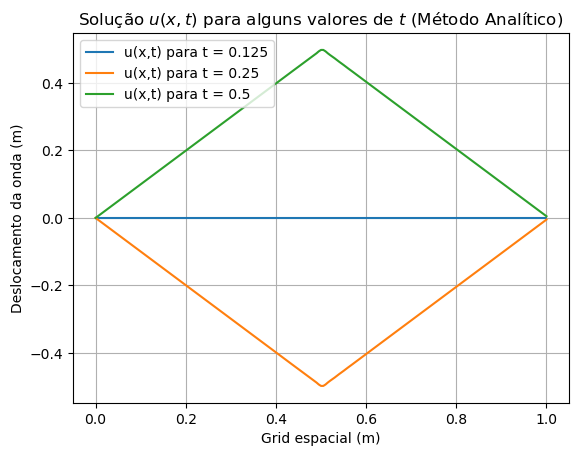

In [68]:
a = 0 # Mínimo espacial (à esquerda)
L = 1 # b é o máximo espacial (à direita), que coindice com o 
N = 201 # Número de repartições do intervalo
v = 4 # Parametro (velocidade) da equação de onda
dx = (L-a)/N # Espaçamendo do grid espacial
xs = np.linspace(a,L,N) # Grid espacial
u_x_0 = np.zeros(N, float) 

Max = 100
Cn = np.zeros(Max, float)
for n in range(1,Max):
    Cn[n] = C(n)

tempos = [0.125, 0.25, 0.5]

u_x_t_fourier = []

for t in tempos:
    u_x_t = np.zeros(N, float)
    for i in range(N):
        aux = 0
        for n in range(Max):
            aux+= Cn[n]*sin(n*pi*(i*dx)/L)*cos(v*n*pi*t/L)
        u_x_t[i] = aux
        
    u_x_t_fourier.append(u_x_t)
    
    plt.plot(xs,u_x_t, label = f'u(x,t) para t = {t}')
    

u_x_t_fourier = np.array(u_x_t_fourier)



plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.title("Solução $u(x,t)$ para alguns valores de $t$ (Método Analítico)")
plt.grid()
plt.legend()
plt.show()

### 2. **Resolução Numérica**

Para o desenvovimento do método numérico, primeiro consideremos a seguinte solução trivial para a Equação de Onda:

$$ u_k(x,t) = \sin{(\frac{\pi kx}{L})}e^{i\omega t}$$

É fácil verificar que essa equação safisfaz as condições de contorno (ser zero em $x=0$ e $x=L$). Também é natural o desenvolvimento para confirmar que a expressão respeite a Equação de Onda, desde que:

$$ \omega = \frac{\pi vk}{L}$$

Agora discretizando o domínio espacial, dividindo a corda em $N$ intervalores iguais, com $N+1$ pontos. A expressão para o enésimo ponto do grif será:

$$ x_n = \frac{n}{N}L$$

A solução, a altura, da onda nesse ponto será:

$$u_k(x_n,t) = \sin{(\frac{\pi k}{L}x_n)}exp{(i\frac{\pi vkt}{L})}$$

$$u_k(x_n,t) = \sin{(\frac{\pi k}{L}\frac{nL}{N})}exp{(i\frac{\pi vkt}{L})}$$

$$u_k(x_n,t) = \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vkt}{L})}$$

A solução aqui exposta não safisfaz a condiçao inicial. Para resolver isso, vamos considerar uma superposição dessas expressões, assim tornando possível a determinação de condições iniciais mais especificas, Nós podemos fazer isso porque a Equação de Onda é linear. Assim:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} b_k \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vkt}{L})}$$

Nota que, para $t=0$, a solução toma a forma de 

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} b_k \sin{(\frac{\pi k n}{N})}$$

Como $b_k$ pode ser um número complexo, podemos considerar a seguinte forma para ele: 

$$ b_k = \alpha_k + i\eta_k $$

Assim:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vkt}{L})}$$

Analisando agora na condição inicial de $u(x,t)$ (ou seja, em $t=0$):

$$ u(x_n,0) = \frac{1}{N}\sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vk0}{L})} = \frac{1}{N}\sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})}$$

Contudo, considerando a própria natureza física de $u(x,0)$, teremos que o lado esquerdo da equação sempre será um valor real, justamente porque um deslocamento sempre o é. Assim, para igualdade ser verdadeira, $b_k$ será composto apenas pelos reais $\alpha_k$. Resultando em: 

$$ u(x_n,0) = \frac{1}{N}\sum_{k=1}^{N-1} \alpha_k \sin{(\frac{\pi k n}{N})}$$

Onde obtemos simplesmente uma Série de Fourier em senos com coeficientes $\alpha_k$.

De forma similar, podemos fazer essa análise com a outra condição inicial ($\frac{\partial u(x_n,0)}{\partial t}$):

Primeiro obtendo $\frac{\partial u(x_n,t)}{\partial t}$:

$$ \frac{\partial u(x_n,t)}{\partial t} = \frac{\partial [\frac{1}{N}\sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vkt}{L})}]}{\partial t} = \frac{1}{N} \sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})} \frac{\partial [exp{(i\frac{\pi vkt}{L})}]}{\partial t} $$

$$ \frac{\partial u(x_n,t)}{\partial t} = \frac{1}{N} \sum_{k=1}^{N-1}( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})} \exp{(\frac{i\pi v k t}{L})} \frac{i\pi vk}{L}$$

$$ \frac{\partial u(x_n,t)}{\partial t} = \frac{1}{N} \frac{\pi v}{L} \sum_{k=1}^{N-1} k (i\alpha_k -\eta_k) \sin{(\frac{\pi k n}{N})} \exp{(\frac{i\pi v k t}{L})}$$

Como vamos considerar o instante com $t=0$:

$$ \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N} \frac{\pi v}{L} \sum_{k=1}^{N-1} k (i\alpha_k -\eta_k) \sin{(\frac{\pi k n}{N})}$$

De novo podemos usar o argumento de que o termo à esquerda da expressão é sempre real, obetendo:

$$ \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N} \frac{\pi v}{L} \sum_{k=1}^{N-1} k (-\eta_k) \sin{(\frac{\pi k n}{N})}$$

$$ \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N} (-\frac{\pi v}{L}) \sum_{k=1}^{N-1} k\eta_k \sin{(\frac{\pi k n}{N})}$$

Apesar do valor numérico, chegemos em outra série de senos, dessa vez com coeficientes $k\eta_k$

Por fim, vamos voltar à expressão base do método:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} b_k \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vkt}{L})}$$

Utilizando a identidade de Euler $e^{i\theta} = \cos{(\theta)} + i\sin{(\theta)}$ e $b_k = \alpha_k+i\eta_k$:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} (\alpha_k+i\eta_k) \sin{(\frac{\pi k n}{N})}\Big[\cos{(\frac{\pi vkt}{L})} + i\sin{(\frac{\pi vkt}{L})}\Big] $$

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} \Big[[\alpha_k\cos{(\frac{\pi vkt}{L})} + \alpha_ki\sin{(\frac{\pi vkt}{L})}] + [i\eta_k\cos{(\frac{\pi vkt}{L})} + i\eta_ki\sin{(\frac{\pi vkt}{L})}]\Big]\sin{(\frac{\pi kn}{N})}$$

Temos como um resultado geral que tanto a parte real como a parte imaginária dessa soma é solução da Equação de Onda. Porém, por motivos físicos, tomaremos apenas a parte real da solução, obtendo:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} \Big[\alpha_k\cos{(\frac{\pi vkt}{L})}-\eta_k\sin{(\frac{\pi vkt}{L})}\Big]\sin{(\frac{\pi kn}{N})}$$

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sin, cos, pi
from numpy.fft import rfft

In [62]:
# 1D DST Type-I
def dst(y):
    N = len(y)
    y2 = np.empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    
    y2[len(y2)-1:N:-1] = -1*y[1:]
    
    a = -np.imag(rfft(y2))[:N]
    a[0] = 0.0

    return a

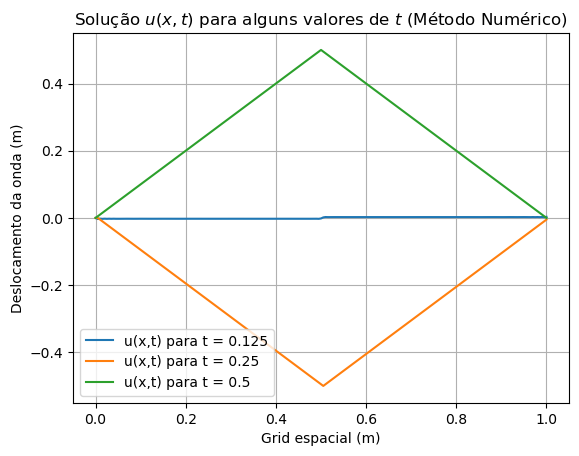

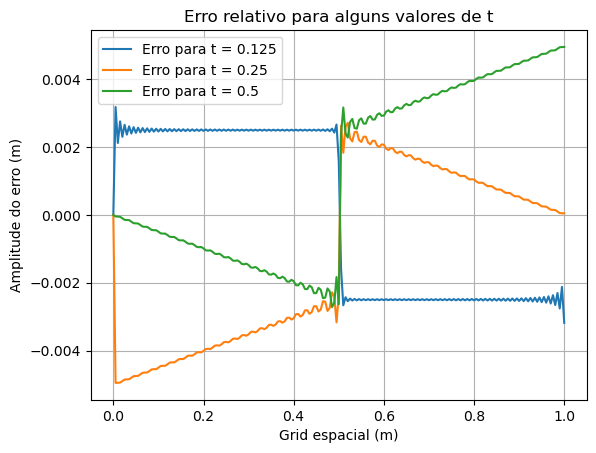

In [69]:
L = 1.0
v = 4

xs = np.linspace(0,L,N)
dx = xs[1] - xs[0]

u_x_0 = np.zeros(N, float)

for i in range(N):
    u_x_0[i] = f(i*dx, L) # condição inicial

alfas = dst(u_x_0) # pegar os alfas

# Os etas são todos nulos; não há velocidade inicial 
etas = np.zeros(len(alfas), float) # todos etas = 0

u_x_t_espectral = []

for t in tempos:
    u_x_t = np.zeros(N, float)
    for n in range(N):
        aux = 0
        for k in range(1,N):
            aux += (alfas[k]*cos(pi*v*k*t/L)-etas[k]*sin(pi*v*k*t/L))*sin(pi*k*n/N)    # Solução do método 
        u_x_t[n] = aux/N

    u_x_t_espectral.append(u_x_t)
    
    plt.plot(xs,u_x_t, label = f'u(x,t) para t = {t}')

u_x_t_espectral = np.array(u_x_t_espectral)


plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.title("Solução $u(x,t)$ para alguns valores de $t$ (Método Numérico)")
plt.grid()
plt.legend()
plt.show()


erro =  u_x_t_fourier - u_x_t_espectral

for t in range(len(tempos)):
    plt.plot(xs, erro[t], label = f'Erro para t = {tempos[t]}')    

plt.xlabel("Grid espacial (m)")
plt.ylabel("Amplitude do erro (m)")
plt.title("Erro relativo para alguns valores de t")
plt.grid()
plt.legend()
plt.show()

### Determinando os $C_n$

$$ C_n = \frac{2}{L}[\int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx + \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx]$$

Vamos resolver cada integral dessa separadamente. 

- Começando pela primeira:

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx $$

Iremos utilizar a tecnica de integração por partes $\int fg^{\prime} = fg - \int f^{\prime}g$, com $f = x$ e $g^{\prime} = sin{(\frac{n\pi x}{L})}$.

Considerando que $f^{\prime} = 1$ e $g = -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}$, obtemos:

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = x (-\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\Big|_{0}^{\frac{L}{2}}) - \int_{0}^{\frac{L}{2}} -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}} dx$$

$$\int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi} (x\cos{(\frac{n\pi x}{L})}\Big|_{0}^{\frac{L}{2}}) + \frac{L}{n\pi}\int_{0}^{\frac{L}{2}} cos{\frac{n\pi x}{L}} dx$$

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi}(\frac{L}{2}\cos{(\frac{n\pi}{L}\frac{L}{2}) - 0}) + \frac{L}{n\pi} (\frac{\sin{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\Big|_{0}^{\frac{L}{2}})$$

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}(\sin{(\frac{n\pi x}{L})}\Big|_{0}^{\frac{L}{2}})$$

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}(\sin{(\frac{n\pi}{L}\frac{L}{2})} - \sin{(\frac{n\pi}{L}0)})$$

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}$$

Essa é a expressão final para nossa primera integral, onde o termo do cosseno e do seno vão ficar alternando entre $1$, $-1$ e $0$.

- Segunda integral:

$$  \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx = \int_{\frac{L}{2}}^{L} L \sin{(\frac{n\pi x}{L})} \, dx - \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx$$

Para o primeiro termo:

$$ \int_{\frac{L}{2}}^{L} L \sin{(\frac{n\pi x}{L})} \, dx = L\int_{\frac{L}{2}}^{L} \sin{(\frac{n\pi x}{L})} \, dx = L(-\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\Big|_{\frac{L}{2}}^{L}) = -\frac{L^2}{n\pi}(\cos{(\frac{n\pi x}{L})}\Big|_{\frac{L}{2}}^{L})$$

$$ \int_{\frac{L}{2}}^{L} L \sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{n\pi}[cos{(\frac{n\pi}{L}L) - cos{(\frac{n\pi}{L}\frac{L}{2})}}]$$

$$ \int_{\frac{L}{2}}^{L} L \sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{n\pi}[\cos{(n\pi )} - \cos{(\frac{\pi}{2}n)}] $$

$$ \int_{\frac{L}{2}}^{L} L \sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{n\pi}\cos{(n\pi )} + \frac{L^2}{n\pi}\cos{(\frac{\pi}{2}n)}] $$

Para o segundo termo:

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx$$

Vamos de novo utilizar a integração por partes $\int fg^{\prime} = fg - \int f^{\prime}g$, com $f = x$ e $g^{\prime} = sin{(\frac{n\pi x}{L})}$.

Lembrando que $f^{\prime} = 1$ e $g = -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}$. Assim:

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = x (-\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\Big|_{\frac{L}{2}}^{L}) - \int_{\frac{L}{2}}^{L} -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}} dx$$

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx  = -\frac{L}{n\pi} (x\cos{(\frac{n\pi x}{L})}\Big|_{\frac{L}{2}}^{L}) + \frac{L}{n\pi}\int_{\frac{L}{2}}^{L} cos{\frac{n\pi x}{L}} dx$$

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi}[L\cos{(\frac{n\pi}{L}L)} - \frac{L}{2}\cos{(\frac{n\pi}{L}\frac{L}{2})}] + \frac{L}{n\pi}(\frac{\sin{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\Big|_{\frac{L}{2}}^{L})$$

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi}[Lcos{(n\pi)} - \frac{L}{2}\cos{(\frac{\pi}{2}n)}] + \frac{L^2}{n^2\pi^2}(\sin{(\frac{n\pi x}{L})}\Big|_{\frac{L}{2}}^{L})$$

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi}[Lcos{(n\pi)} - \frac{L}{2}\cos{(\frac{\pi}{2}n)}] + \frac{L^2}{n^2\pi^2}[\sin{(\frac{n\pi}{L}L)} - \sin{(\frac{n\pi}{L}\frac{L}{2})}]$$

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi}[Lcos{(n\pi)} - \frac{L}{2}\cos{(\frac{\pi}{2}n)}] + \frac{L^2}{n^2\pi^2}[\sin{(n\pi)}-\sin{(\frac{\pi}{2}n)}] $$

Aqui o termo $\sin{(n\pi)}$ será sempre igual a 0. Então:

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{n\pi}cos{(n\pi)} + \frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} - \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)} $$

Compactando a segunda integral:

$$ \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx  = -\frac{L^2}{n\pi}\cos{(n\pi )} + \frac{L^2}{n\pi}\cos{(\frac{\pi}{2}n)} - \Big[ -\frac{L^2}{n\pi}cos{(n\pi)} + \frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} - \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}\Big]$$

$$ \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx  = -\frac{L^2}{n\pi}\cos{(n\pi)}+\frac{L^2}{n\pi}\cos{(\frac{\pi}{2}n)} + \Big[\frac{L^2}{n\pi}\cos{(n\pi)}-\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}\Big]$$

$$ \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx  = \frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}$$

Assim, a expressão final será:

$$ C_n = \frac{2}{L}[\int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx + \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx]$$ 

$$ C_n = \frac{2}{L}\Big[-\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)} + [\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}]\Big]$$

$$ C_n = \frac{2}{L}\Big[\frac{2L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}     \Big]$$

$$C_n = \frac{4L}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}$$

Os primeiros termos da sequência serão:

$$ C_1 = \frac{4L}{1^2\pi^2}\sin{(\frac{\pi}{2}1)} = \frac{4L}{1^2\pi^2}$$

$$ C_2 = \frac{4L}{2^2\pi^2}\sin{(\frac{\pi}{2}2)} = 0 $$

$$ C_3 = \frac{4L}{3^2\pi^2}\sin{(\frac{\pi}{2}3)} = -\frac{4L}{3^2\pi^2}$$

$$ C_4 = \frac{4L}{4^2\pi^2}\sin{(\frac{\pi}{2}4)} = 0$$

Pelo padrão, percebemos que a sequência será alternada nos $n$ ímpares e nula para $n$ par. Assim:

$$ C_n  = 
\begin{cases} 
    \frac{4}{n^2\pi^2} (-1)^{\frac{n-1}{2}}, & \text{se n for ímpar} \\
    0, & \text{se n for par}  
\end{cases}$$